In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [18]:
# Incarcarea si curatarea datelor
data = pd.read_csv("iris2D.csv")
dataClean = data.dropna()

# Selectarea atributelor predictive
X = dataClean.iloc[:,0:2]

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X)

ac = AgglomerativeClustering(n_clusters=3)
ac_labels = ac.fit_predict(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

em = GaussianMixture(n_components=3)
em_labels = em.fit_predict(X)

kmeans_silhouette = silhouette_score(X, kmeans_labels)
ac_silhouette = silhouette_score(X, ac_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels)
em_silhouette = silhouette_score(X, em_labels)

In [24]:
print('\n kMeans = {} \n Agglomerative = {} \n DBSCAN = {} \n EM = {}'
             .format(kmeans_silhouette, ac_silhouette, dbscan_silhouette, em_silhouette))


 kMeans = 0.6602760882193361 
 Agglomerative = 0.6571856448729174 
 DBSCAN = 0.7667234280554557 
 EM = 0.6493019044944273


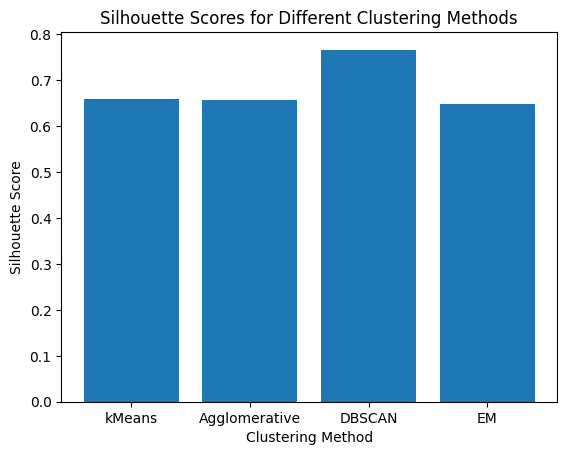

In [25]:
# Afisarea grafica a scorurilor silouette
scorList = [kmeans_silhouette, ac_silhouette, dbscan_silhouette, em_silhouette]
labels = ['kMeans', 'Agglomerative', 'DBSCAN', 'EM']

plt.bar(labels, scorList)
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clustering Methods')
plt.show()